# Detección de Noticias Falsas y Reales con Fake and Real News Dataset

## Descripción de los datos
Este proyecto utiliza el dataset *Fake and Real News Dataset* para desarrollar un algoritmo capaz de identificar noticias falsas ("fake news") y noticias reales ("real news"). El conjunto de datos contiene textos de noticias etiquetados según su veracidad, permitiendo entrenar y evaluar modelos de clasificación de texto.

## Motivación y enfoque
La propagación de noticias falsas representa un desafío importante para la sociedad, afectando la percepción pública y la toma de decisiones informadas. Se busca aplicar técnicas de clasificación de texto y aprendizaje supervisado para detectar patrones que permitan diferenciar noticias verdaderas de las falsas, contribuyendo así a mitigar la desinformación.

## Objetivos del análisis
- Explorar el dataset combinado y preparar los textos para su uso en modelos de clasificación.  
- Aplicar técnicas de vectorización para transformar el texto en representaciones numéricas.  
- Entrenar y evaluar distintos modelos de clasificación  utilizando métricas como Accuracy, Precision, Recall y F1 Score.  
- Comparar el desempeño de los modelos en un conjunto de prueba, identificando los más efectivos en base al F1 Score.

## Metodología

1. **Exploración y preparación de los datos**  
   - Revisión general del dataset para entender su estructura y contenido.  
   - Limpieza y preprocesamiento del texto (eliminación de caracteres especiales, minúsculas, etc.).    
   - Transformación del texto en representaciones numéricas adecuadas (TF-IDF).

2. **Entrenamiento y evaluación de modelos**  
    - Entrenamiento de múltiples modelos de clasificación (Naive Bayes, SVM, Random Forest, KNN, Gradient Boosting).  
    - Evaluación de cada modelo utilizando métricas como Accuracy, Precision, Recall y F1 Score.  
    - Registro de resultados en una tabla resumen ordenada por F1 Score, como base para la comparación de modelos.
    - Discusión final sobre las diferencias de rendimiento observadas entre los modelos evaluados.

### Importar Librerías

In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Cargar Dataset

In [3]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

fake_df['label'] = 0
true_df['label'] = 1

In [4]:
df = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


### Limpieza y preprocesamiento de datos

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
def limpiar_texto(texto):
    texto = texto.lower()                      
    texto = re.sub(r"[^\w\s]", "", texto)     
    texto = re.sub(r"\d+", "", texto)         
    texto = " ".join(texto.split())            
    return texto
df["texto_limpio"] = df["text"].apply(limpiar_texto)

In [11]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df["texto_limpio"])
y = df["label"]

### Modelado

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"{nombre}:\n")
    print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

Naive Bayes:

              precision    recall  f1-score   support

        Fake       0.96      0.94      0.95      4696
        True       0.94      0.96      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



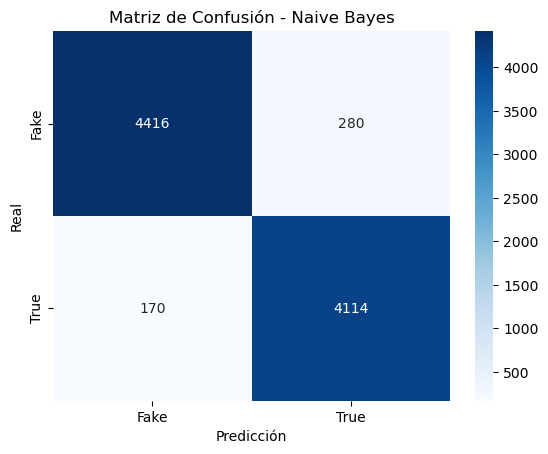

In [48]:
nb_model = MultinomialNB()
evaluar_modelo(nb_model, "Naive Bayes")

SVM:

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        True       1.00      0.99      0.99      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



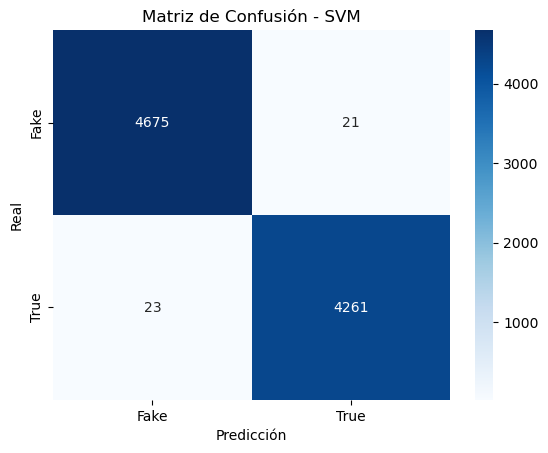

In [50]:
svm_model = LinearSVC(dual='auto')
evaluar_modelo(svm_model, "SVM")

Random Forest:

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
        True       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



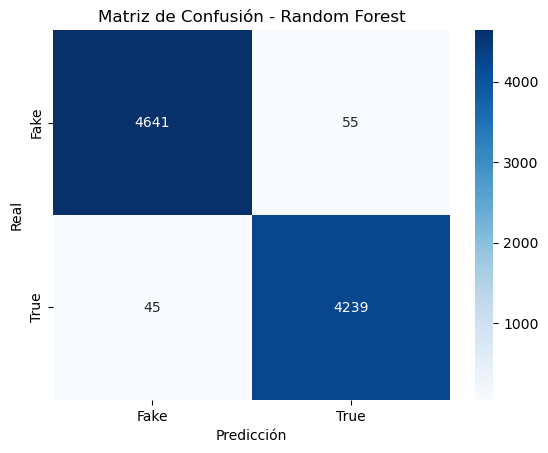

In [52]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
evaluar_modelo(rf_model, "Random Forest")

KNN:

              precision    recall  f1-score   support

        Fake       0.58      1.00      0.74      4696
        True       0.98      0.22      0.36      4284

    accuracy                           0.63      8980
   macro avg       0.78      0.61      0.55      8980
weighted avg       0.77      0.63      0.56      8980



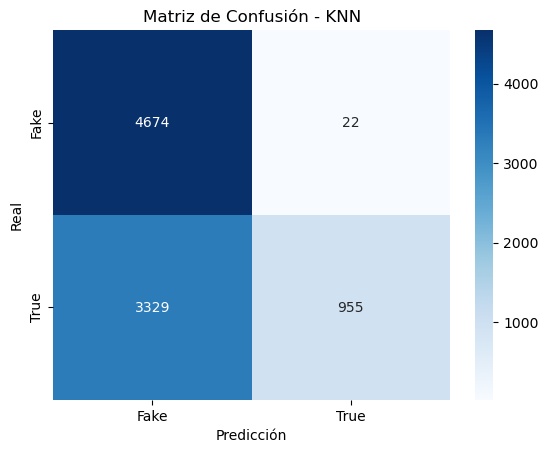

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluar_modelo(knn_model, "KNN")

Gradient Boosting:

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4696
        True       0.99      1.00      0.99      4284

    accuracy                           1.00      8980
   macro avg       0.99      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



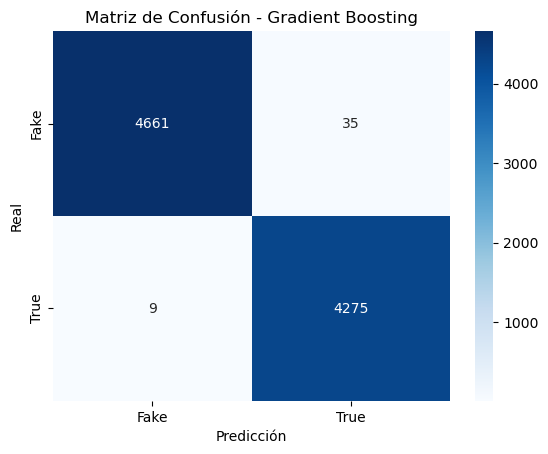

In [56]:
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
evaluar_modelo(gb_model, "Gradient Boosting")

### Evaluación de Modelos

In [58]:
modelos_entrenados = {
    "Naive Bayes": nb_model,
    "SVM (LinearSVC)": svm_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Gradient Boosting": gb_model
}

resultados = []
for nombre, modelo in modelos_entrenados.items():
    y_pred = modelo.predict(X_test)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Score", ascending=False)
print(df_resultados)

                Modelo  Accuracy  Precision    Recall  F1 Score
4    Gradient Boosting  0.995100   0.991879  0.997899  0.994880
1      SVM (LinearSVC)  0.995100   0.995096  0.994631  0.994863
2        Random Forest  0.988864   0.987191  0.989496  0.988342
0          Naive Bayes  0.949889   0.936277  0.960317  0.948145
3  K-Nearest Neighbors  0.626837   0.977482  0.222923  0.363049


### Conclusiones

Luego de evaluar cinco modelos de clasificación para detectar noticias verdaderas y falsas. Gradient Boosting fue el más destacado, logrando un excelente balance entre precisión y recall, ideal para este tipo de tareas críticas aplicando modelos de verificación automática de noticias. Por otro lado, SVM (LinearSVC) también mostró alto rendimiento, siendo especialmente eficiente en textos con alta dimensionalidad como los representados con TF-IDF.

Random Forest obtuvo buenos resultados en precisión, aunque su recall fue ligeramente inferior. Naive Bayes, demostró ser sorprendentemente efectivo, rápido y adecuado para implementaciones ligeras o en tiempo real. K-Nearest Neighbors no resultó adecuado para este problema debido a su bajo desempeño en contextos con datos textuales de alta dimensión, como los generados por TF-IDF.

En resumen, Gradient Boosting o SVM tuvieron los mejores resultados para este tipo de aplicación y generación de soluciones robustas, Naive Bayes como opción rápida y eficiente, y evitar KNN en este tipo de tareas de clasificación textual.